<div><img src="https://live.staticflickr.com/5626/22168833761_a36d88de4b_b.jpg" width=500 /></div>

## Exploration Data Analysis of Volcanic Eruption 

#### load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data

In [ ]:
volcano=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/volcano.csv")
eruptions=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv")

In [ ]:
#volcanic_eruptions data
df=volcano.merge(eruptions ,on=['volcano_number'],how="right")

In [ ]:
#Replace empty spaces with Nan
df.replace(r'\s+', np.nan, regex=True,inplace=True)

In [ ]:
df.drop(['minor_rock_5', 'minor_rock_3', 'minor_rock_4','tectonic_settings','evidence_category','major_rock_5','latitude_x','longitude_x','volcano_name_x','region','eruption_category'],1,inplace=True)

In [ ]:
df['primary_volcano_type']=df['primary_volcano_type'].replace({'Stratovolcano(es)':'Stratovolcano','Shield(s)':'Shield','Caldera(s)':'Caldera','Maar(s)':'Maar','Complex(es)':'Complex','Stratovolcano?':'Stratovolcano'})

#### Descriptive statistics

In [ ]:
df.describe(include='all')

,volcano_number,primary_volcano_type,last_eruption_year,country,subregion,elevation,major_rock_1,major_rock_2,major_rock_3,major_rock_4,minor_rock_1,minor_rock_2,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km,volcano_name_y,eruption_number,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_y,longitude_y
count,11178.000000,8993,9559,7512,3723,9559.000000,646,2451,1758,382,1329,394,9.559000e+03,9.559000e+03,9.559000e+03,9.559000e+03,8999,11178.000000,1333,8272.000000,11177.000000,10985.000000,10982.000000,1329,4332.000000,4329.000000,4326.000000,11178.000000,11178.000000
unique,NaN,8,342,55,25,NaN,4,4,4,4,4,4,NaN,NaN,NaN,NaN,641,NaN,309,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN
top,NaN,Stratovolcano,2020,Japan,Honshu,NaN,Dacite,Dacite,Dacite,Rhyolite,Dacite,Dacite,NaN,NaN,NaN,NaN,Etna,NaN,Naka-dake,NaN,NaN,NaN,NaN,Tephrochronology,NaN,NaN,NaN,NaN,NaN
freq,NaN,5827,2279,1653,682,NaN,302,1961,907,216,1065,251,NaN,NaN,NaN,NaN,241,NaN,172,NaN,NaN,NaN,NaN,1046,NaN,NaN,NaN,NaN,NaN
mean,300284.371176,NaN,NaN,NaN,NaN,2217.471074,NaN,NaN,NaN,NaN,NaN,NaN,3.692338e+04,5.578794e+04,4.302366e+05,3.632130e+06,NaN,15666.905439,NaN,1.947897,622.848260,3.450888,7.015025,NaN,1917.326639,6.220836,13.315996,16.865778,31.572377
std,52321.193203,NaN,NaN,NaN,NaN,1326.973598,NaN,NaN,NaN,NaN,NaN,NaN,2.607263e+05,2.693210e+05,8.494366e+05,6.598072e+06,NaN,3297.612433,NaN,1.161098,2482.174317,4.071419,9.645386,NaN,157.646408,3.686128,9.831282,30.761752,115.248384
min,210010.000000,NaN,NaN,NaN,NaN,-2500.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,10001.000000,NaN,0.000000,-11345.000000,0.000000,0.000000,NaN,-475.000000,0.000000,0.000000,-77.530000,-179.970000
25%,263310.000000,NaN,NaN,NaN,NaN,1281.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,7.000000e+01,1.718000e+03,6.399900e+04,NaN,12817.250000,NaN,1.000000,680.000000,0.000000,0.000000,NaN,1895.000000,3.000000,4.000000,-6.102000,-77.656000
50%,290050.000000,NaN,NaN,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.280000e+02,3.122000e+03,6.297400e+04,7.178200e+05,NaN,15650.500000,NaN,2.000000,1847.000000,1.000000,0.000000,NaN,1957.000000,6.000000,15.000000,17.600000,55.708000
75%,343030.000000,NaN,NaN,NaN,NaN,3008.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.032000e+03,2.305900e+04,4.447370e+05,3.631492e+06,NaN,18463.750000,NaN,2.000000,1950.000000,7.000000,15.000000,NaN,1992.000000,9.000000,21.000000,40.821000,139.394000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11178 entries, 0 to 11177
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            11178 non-null  int64  
 1   primary_volcano_type      8993 non-null   object 
 2   last_eruption_year        9559 non-null   object 
 3   country                   7512 non-null   object 
 4   subregion                 3723 non-null   object 
 5   elevation                 9559 non-null   float64
 6   major_rock_1              646 non-null    object 
 7   major_rock_2              2451 non-null   object 
 8   major_rock_3              1758 non-null   object 
 9   major_rock_4              382 non-null    object 
 10  minor_rock_1              1329 non-null   object 
 11  minor_rock_2              394 non-null    object 
 12  population_within_5_km    9559 non-null   float64
 13  population_within_10_km   9559 non-null   float64
 14  popula

####Working with date and time

In [ ]:
end_year=df[['end_year','end_month','end_day']]
end_year.columns=['year','month','day']

In [ ]:
start_year=df[['start_year','start_month','start_day']]
start_year.columns=['year','month','day']

In [ ]:

df['end_date']=pd.to_datetime(end_year,errors='coerce')
df['start_date']=pd.to_datetime(start_year,errors='coerce')
df['duration']=df['end_date']-df['start_date']

In [ ]:
df.head()

,volcano_number,primary_volcano_type,last_eruption_year,country,subregion,elevation,major_rock_1,major_rock_2,major_rock_3,major_rock_4,minor_rock_1,minor_rock_2,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km,volcano_name_y,eruption_number,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_y,longitude_y,end_date,start_date,duration
0,266030,Stratovolcano,2020,Indonesia,Sulawesi,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,4724.0,69991.0,501336.0,1696768.0,Soputan,22354,NaN,NaN,2020.0,3.0,23.0,NaN,2020.0,4.0,2.0,1.112,124.737,2020-04-02,2020-03-23,10 days
1,266030,Stratovolcano,2020,Indonesia,Sulawesi,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,4724.0,69991.0,501336.0,1696768.0,Soputan,22293,NaN,3.0,2018.0,10.0,2.0,NaN,2018.0,12.0,16.0,1.112,124.737,2018-12-16,2018-10-02,75 days
2,266030,Stratovolcano,2020,Indonesia,Sulawesi,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,4724.0,69991.0,501336.0,1696768.0,Soputan,22105,NaN,3.0,2016.0,1.0,2.0,NaN,2016.0,2.0,7.0,1.112,124.737,2016-02-07,2016-01-02,36 days
3,266030,Stratovolcano,2020,Indonesia,Sulawesi,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,4724.0,69991.0,501336.0,1696768.0,Soputan,20988,NaN,3.0,2015.0,1.0,6.0,NaN,2015.0,3.0,7.0,1.112,124.737,2015-03-07,2015-01-06,60 days
4,266030,Stratovolcano,2020,Indonesia,Sulawesi,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,4724.0,69991.0,501336.0,1696768.0,Soputan,20821,NaN,3.0,2012.0,8.0,26.0,NaN,2012.0,9.0,19.0,1.112,124.737,2012-09-19,2012-08-26,24 days


##### Which year had the most occurence of eruption?

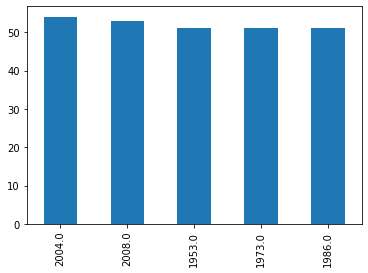

In [ ]:
df['start_year'].value_counts().head().plot(kind="bar")

##### Longest volcanic eruption

In [ ]:
df.loc[df['duration'].idxmax()]


volcano_number                           257100
primary_volcano_type              Stratovolcano
last_eruption_year                         2020
country                                 Vanuatu
subregion                               Vanuatu
elevation                                   361
major_rock_1                                NaN
major_rock_2                                NaN
major_rock_3                                NaN
major_rock_4                                NaN
minor_rock_1                                NaN
minor_rock_2                                NaN
population_within_5_km                     3636
population_within_10_km                    6068
population_within_30_km                   24748
population_within_100_km                  32427
volcano_name_y                            Yasur
eruption_number                           15355
area_of_activity                            NaN
vei                                           3
start_year                              

##### Shortest eruption

In [ ]:
df.loc[df['duration'].idxmin()]

volcano_number                           266030
primary_volcano_type              Stratovolcano
last_eruption_year                         2020
country                               Indonesia
subregion                              Sulawesi
elevation                                  1785
major_rock_1                                NaN
major_rock_2                                NaN
major_rock_3                                NaN
major_rock_4                                NaN
minor_rock_1                                NaN
minor_rock_2                                NaN
population_within_5_km                     4724
population_within_10_km                   69991
population_within_30_km                  501336
population_within_100_km            1.69677e+06
volcano_name_y                          Soputan
eruption_number                           16426
area_of_activity                            NaN
vei                                           1
start_year                              

##### When did the last volcanic eruption occur?

In [ ]:
df['start_date'].max()

Timestamp('2020-03-23 00:00:00')

#### Explosivity  of volcanoes. 

The Volcanic Explosivity Index (VEI) is a relative measure of the explosiveness of volcanic eruptions.
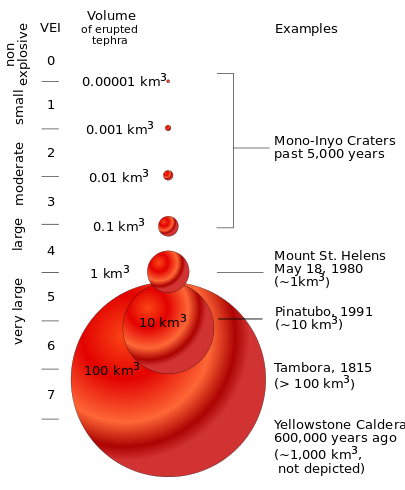



##### how explosive are the volcanic eruptions?

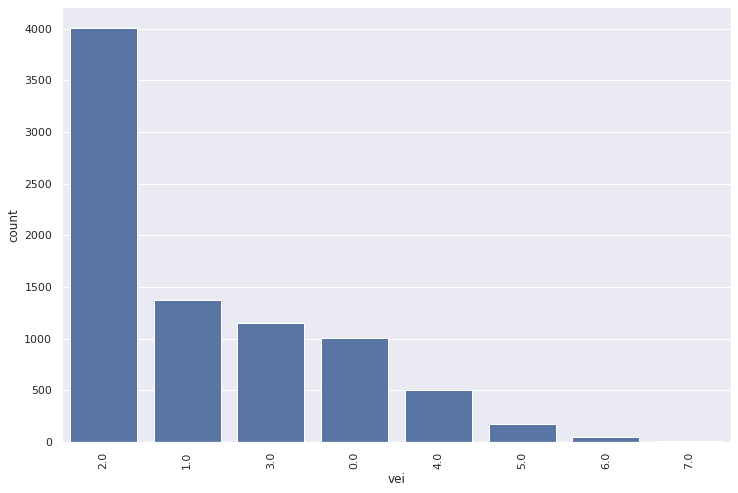

In [ ]:
sns.set()
plt.figure(figsize=(12,8))
sns.countplot(x=df['vei'],order=df['vei'].value_counts().index,color=sns.color_palette()[0])
plt.xticks(rotation=90);

##### Most recent Most explosive eruption

In [ ]:
df.loc[df[df['vei']==7].start_year.idxmax()]

volcano_number                           264040
primary_volcano_type              Stratovolcano
last_eruption_year                         1967
country                               Indonesia
subregion                                   NaN
elevation                                  2850
major_rock_1                                NaN
major_rock_2                                NaN
major_rock_3                                NaN
major_rock_4                                NaN
minor_rock_1                                NaN
minor_rock_2                                NaN
population_within_5_km                     4156
population_within_10_km                   11331
population_within_30_km                   89006
population_within_100_km            1.03603e+06
volcano_name_y                          Tambora
eruption_number                           16231
area_of_activity                            NaN
vei                                           7
start_year                              

#### Which countries were affected by these explosive eruptions?

In [ ]:
bins=[0,1,4,8]
labels=['non_explosive','small','large']
df['vei_group'] = pd.cut(df['vei'], bins=bins, labels=labels, right=False)



<Figure size 864x576 with 0 Axes>

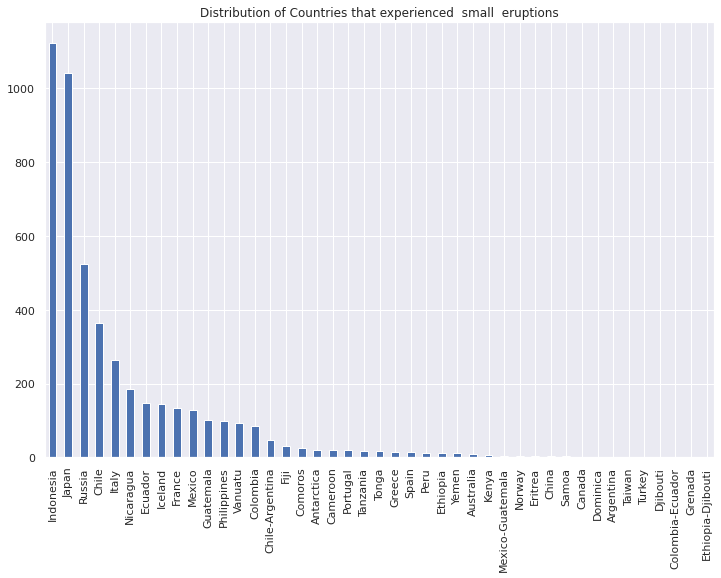

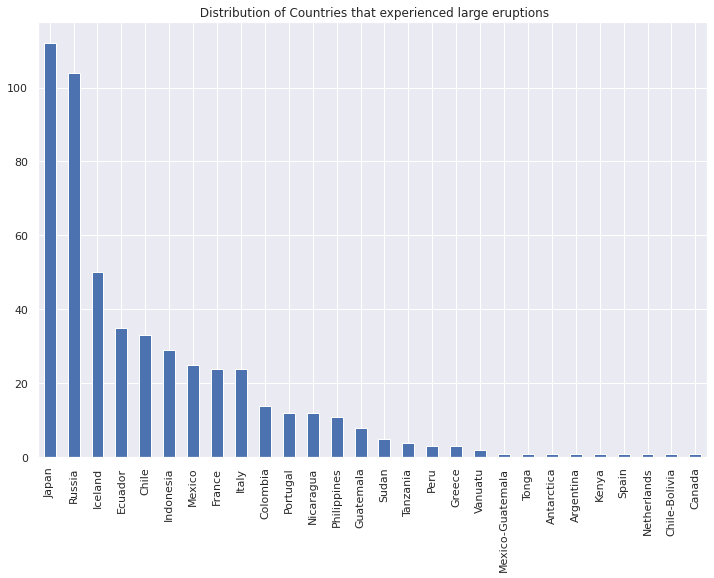

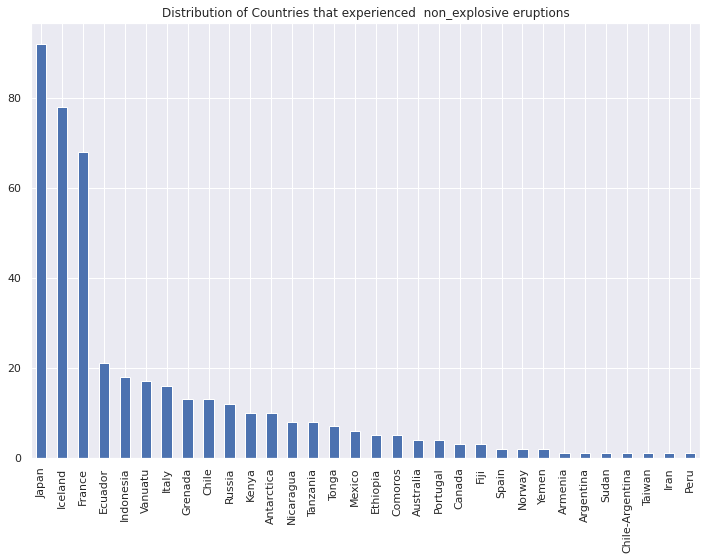

In [ ]:
plt.figure(figsize=(12,8))
chart2, ax2 = plt.subplots()
chart1, ax1 = plt.subplots()
chart3, ax3 = plt.subplots()
df[df['vei_group']=='large'].country.value_counts().plot(kind='bar',ax=ax1,title=" Distribution of Countries that experienced large eruptions",figsize=(12,8))

df[df['vei_group']=='small'].country.value_counts().plot(kind='bar',ax=ax2,title="Distribution of Countries that experienced  small  eruptions",figsize=(12,8))
df[df['vei_group']=='non_explosive'].country.value_counts().plot(kind='bar',ax=ax3,title="Distribution of Countries that experienced  non_explosive eruptions",figsize=(12,8))

##### WHere and when  did this  latest most explosive eruption happen?(and other details)





In [ ]:
df.loc[df[df['vei']==7].start_year.idxmax()]

volcano_number                           264040
primary_volcano_type              Stratovolcano
last_eruption_year                         1967
country                               Indonesia
subregion                                   NaN
elevation                                  2850
major_rock_1                                NaN
major_rock_2                                NaN
major_rock_3                                NaN
major_rock_4                                NaN
minor_rock_1                                NaN
minor_rock_2                                NaN
population_within_5_km                     4156
population_within_10_km                   11331
population_within_30_km                   89006
population_within_100_km            1.03603e+06
volcano_name_y                          Tambora
eruption_number                           16231
area_of_activity                            NaN
vei                                           7
start_year                              

You can read more about the tambora eruption [here](https://www.history.com/news/the-deadliest-volcanic-eruption-in-history)

#### Which country has the most incident of volcanic eruption?

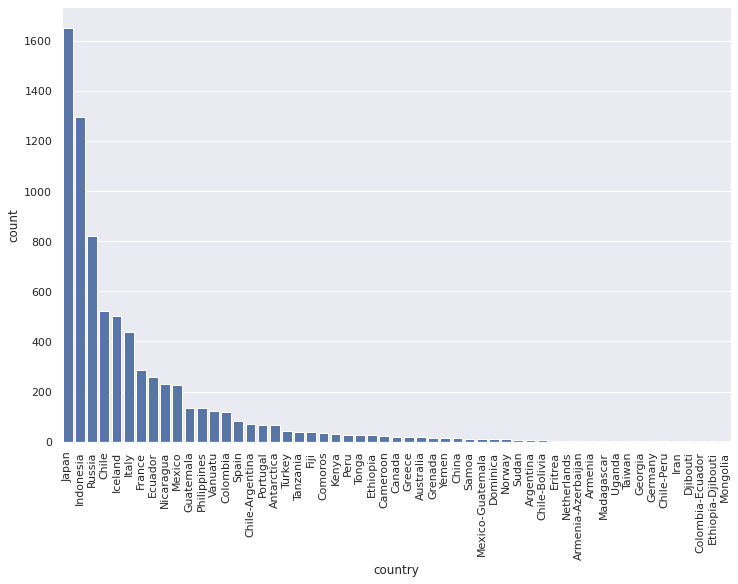

In [ ]:
sns.set()
plt.figure(figsize=(12,8))
sns.countplot(x=df['country'],order=df['country'].value_counts().index,color=sns.color_palette()[0])
plt.xticks(rotation=90);

##### What regions in the country  are these volcanoes located?

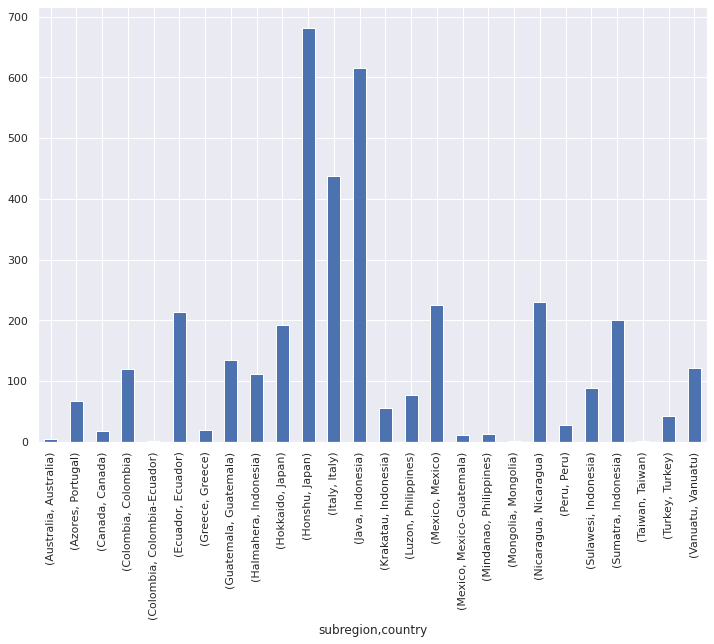

In [ ]:
plt.figure(figsize=(12,8))
df.groupby('subregion')['country'].value_counts().sort_index().plot(kind='bar')

#### Hypothesis : The height of a volcano determines its explosive power

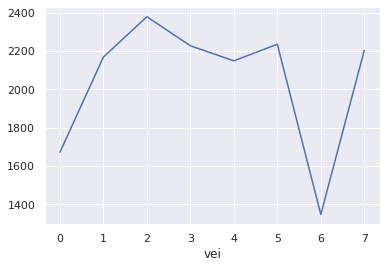

In [ ]:
df.groupby("vei")['elevation'].mean().plot(kind='line')

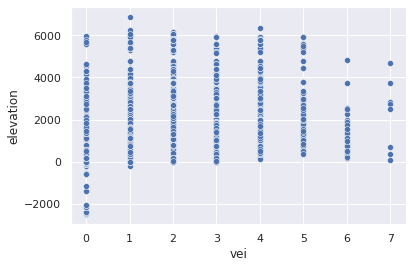

In [ ]:
sns.scatterplot(x=df['vei'], y=df['elevation']);

The height of a volcano has no link with its explosivity

#### What volcano type is most explosive?

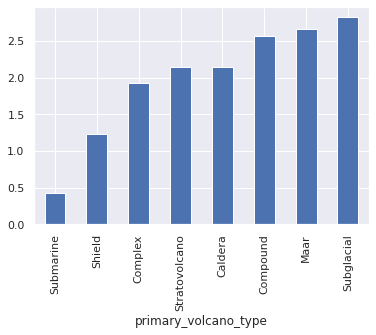

In [ ]:
df.groupby("primary_volcano_type")['vei'].mean().sort_values().plot(kind="bar")
plt.xticks(rotation=90);

In [ ]:
df['primary_volcano_type'].value_counts()

Stratovolcano    5827
Caldera          1071
Shield           1026
Complex           730
Submarine         158
Subglacial        142
Compound           30
Maar                9
Name: primary_volcano_type, dtype: int64

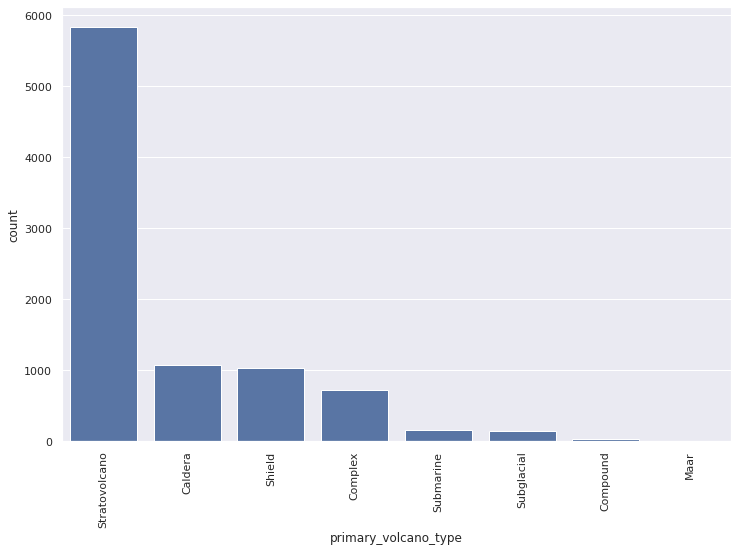

In [ ]:
sns.set()
plt.figure(figsize=(12,8))
sns.countplot(x=df['primary_volcano_type'],order=df['primary_volcano_type'].value_counts().index,color=sns.color_palette()[0])
plt.xticks(rotation=90);

#### What primary_volcano_type was mostly erupted?

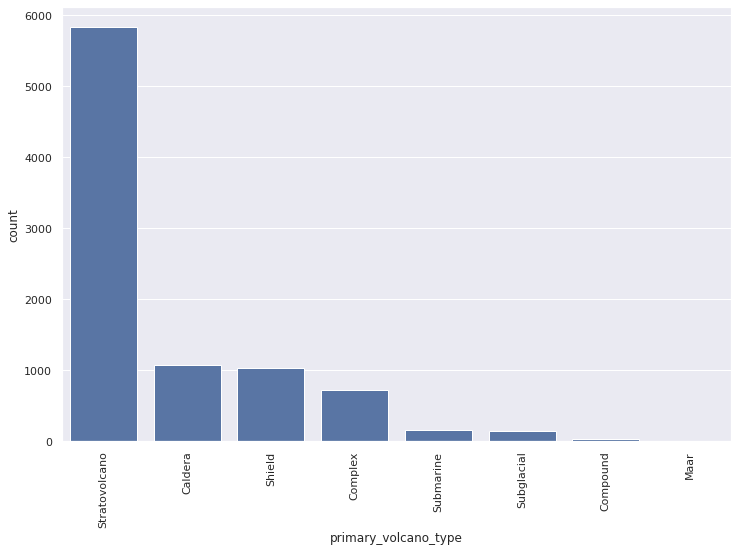

In [ ]:
sns.set()
plt.figure(figsize=(12,8))
sns.countplot(x=df['primary_volcano_type'],order=df['primary_volcano_type'].value_counts().index,color=sns.color_palette()[0])
plt.xticks(rotation=90);

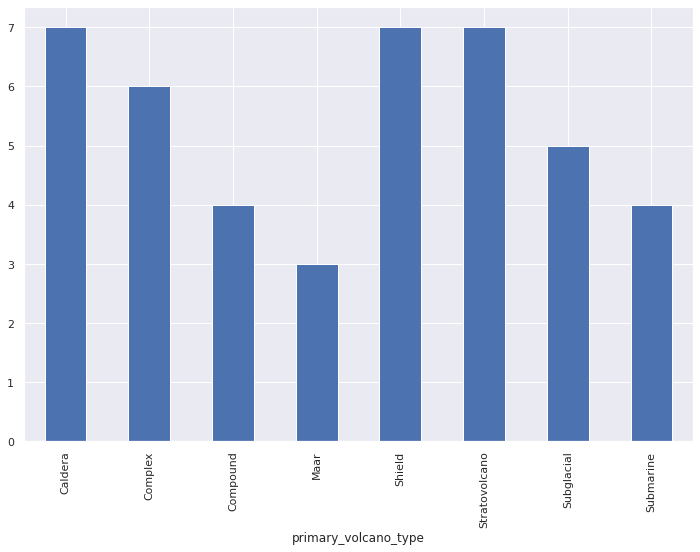

In [ ]:
plt.figure(figsize=(12,8))
df.groupby('primary_volcano_type')['vei'].max().plot(kind='bar')

#### Most frequently erupted major and minor rocks

In [ ]:
major_rocks=pd.melt(df, id_vars=['volcano_number','volcano_name_y'], value_vars=['major_rock_1','major_rock_2','major_rock_3','major_rock_4'],var_name='MAJOR_ROCKS', value_name='TYPE')

In [ ]:
minor_rocks=pd.melt(df, id_vars=['volcano_number','volcano_name_y'], value_vars=['minor_rock_1','minor_rock_2'], var_name='MINOR_ROCKS', value_name='TYPE')

In [ ]:
major_rocks['TYPE'].value_counts().head(1)

Dacite    3328
Name: TYPE, dtype: int64

In [ ]:
minor_rocks['TYPE'].value_counts().head(1)

Dacite    1316
Name: TYPE, dtype: int64

**Most frequently erupted rock is Dacite**

### Enriching dataset

In [ ]:
#Loading Libraries

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#DOwnloading dataset from drive
downloaded = drive.CreateFile({'id':'10V_VlyZYhRbxwjiRRq58RmF_IwjpgzDn'}) 
downloaded.GetContentFile('Historical_Significant_Volcanic_Eruption_Locations.csv')

In [ ]:
#loading dataset
df2= pd.read_csv('Historical_Significant_Volcanic_Eruption_Locations.csv')

In [ ]:
#Taking a slice of the new dataset
slice_df2=df2[['X', 'Y', 'VEI','DAMAGE_MILLIONS_DOLLARS',
       'DAMAGE_AMOUNT_ORDER', 'DAMAGE_DESCRIPTION', 'DEATHS',
       'DEATHS_AMOUNT_ORDER', 'DEATHS_DESCRIPTION', 'DEATHS_TOTAL', 'DEATHS_AMOUNT_ORDER_TOTAL',
       'DEATHS_TOTAL_DESCRIPTION', ]]

In [ ]:
#taking a slice of previous dataset
slice_df=df[['primary_volcano_type','volcano_name_y',
       'country', 'vei','latitude_y', 'longitude_y','start_year']]

In [ ]:
#enrich dataset with damages caused by volcanoes data-merging both slices
df3=slice_df.merge(slice_df2 ,left_on=['latitude_y','longitude_y','vei'],right_on=['Y','X','VEI'],how="inner")

In [ ]:
df3.head()

,primary_volcano_type,volcano_name_y,country,vei,latitude_y,longitude_y,start_year,X,Y,VEI,DAMAGE_MILLIONS_DOLLARS,DAMAGE_AMOUNT_ORDER,DAMAGE_DESCRIPTION,DEATHS,DEATHS_AMOUNT_ORDER,DEATHS_DESCRIPTION,DEATHS_TOTAL,DEATHS_AMOUNT_ORDER_TOTAL,DEATHS_TOTAL_DESCRIPTION
0,Caldera,Taal,Philippines,2.0,14.002,120.993,1977.0,120.993,14.002,2.0,NaN,NaN,NaN,NaN,1.0,Few (~1 to 50 people),NaN,1.0,Few (~1 to 50 people)
1,Caldera,Taal,Philippines,2.0,14.002,120.993,1976.0,120.993,14.002,2.0,NaN,NaN,NaN,NaN,1.0,Few (~1 to 50 people),NaN,1.0,Few (~1 to 50 people)
2,Caldera,Taal,Philippines,2.0,14.002,120.993,1969.0,120.993,14.002,2.0,NaN,NaN,NaN,NaN,1.0,Few (~1 to 50 people),NaN,1.0,Few (~1 to 50 people)
3,Caldera,Taal,Philippines,2.0,14.002,120.993,1968.0,120.993,14.002,2.0,NaN,NaN,NaN,NaN,1.0,Few (~1 to 50 people),NaN,1.0,Few (~1 to 50 people)
4,Caldera,Taal,Philippines,2.0,14.002,120.993,1903.0,120.993,14.002,2.0,NaN,NaN,NaN,NaN,1.0,Few (~1 to 50 people),NaN,1.0,Few (~1 to 50 people)


#### Which  10 volcanoes  have  caused the greatest number of  human deaths ?

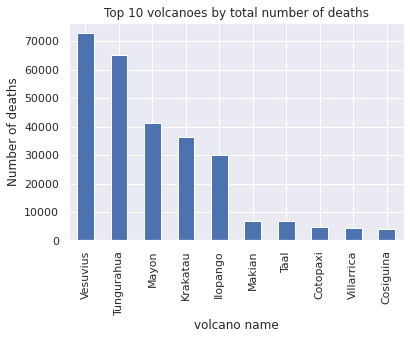

In [ ]:
df3.groupby('volcano_name_y')['DEATHS_TOTAL'].sum().sort_values(ascending=False).head(10).plot(kind="bar",title="Top 10 volcanoes by total number of deaths",xlabel='volcano name',ylabel='Number of deaths');

#### Total number of deaths caused by volcanic eruption

In [ ]:
df3['DEATHS_TOTAL'].sum()

319292.0

#### Trend of Deaths caused by volcanoes in the last 20 years

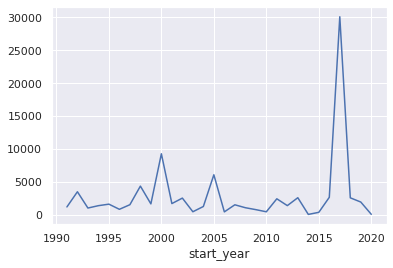

In [ ]:
df3.groupby(df[df['start_year']>1990].start_year)['DEATHS_TOTAL'].sum().plot(kind='line')

Notice the spike between 2015 and 2020

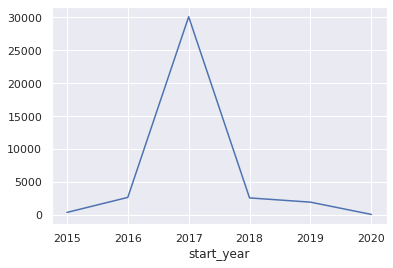

In [ ]:
#plot total deaths from 2015 till date
df3.groupby(df[df['start_year']>2014].start_year)['DEATHS_TOTAL'].sum().plot(kind='line')

### Modelling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Occurence of major rock 1 in primary volcano type')

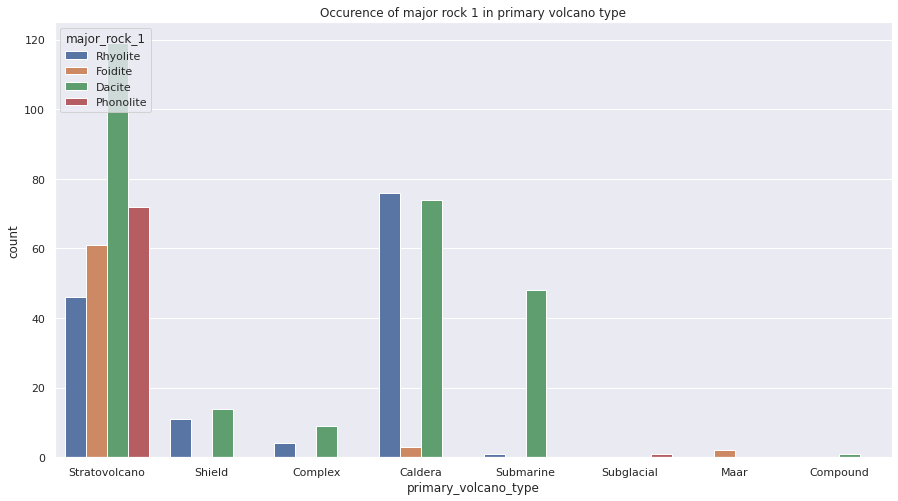

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['primary_volcano_type'],hue=df['major_rock_1'])
plt.title("Occurence of major rock 1 in primary volcano type")

In [ ]:
#Extract data needed for modelling
model_data=df[['primary_volcano_type','major_rock_1']]

In [ ]:
#Fill missing values
model_data.fillna("unknown",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#Replace strings with numeric values for modelling
model_data['primary_volcano_type'].replace({"Stratovolcano":8,"Caldera":7,"Shield":6,"Complex":5,"Submarine":4,"Subglacial":3,"Compound":2,"Maar":1,"unknown":0},inplace=True)
model_data['major_rock_1'].replace({"unknown":0,"Dacite":4,"Rhyolite":3,"Phonolite":2,"Foidite":1},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#Split into features and target
X=model_data[['primary_volcano_type']]
y=model_data['major_rock_1']

In [ ]:
#split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(   X, y, test_size=0.33, random_state=42)

In [ ]:
#Moodel building
from sklearn.linear_model import LogisticRegression as lr
model=lr()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Accuracy score
model.score(X_test,y_test)

0.9419896991054486